In [11]:
import scipy.special as sc
import numpy as np
import math
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['multinomial']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [12]:
def W0(N):
    x=np.zeros(N+1)
    for j in range(len(x)):
        x[j]=2*sc.gamma(j+1)*sc.gamma(N-j+1)/sc.gamma(N+2)*(1-sc.betainc(N-j+1,j+1,0.5))
        #print("Para j={} se obtiene {} y {} luego {}.".format(j,sc.gamma(j+1)*sc.gamma(N-j+1)/sc.gamma(N+1),sc.betainc(N-j+1,j+1,0.5),x[j]))
    return x
W0(1)

array([0.75, 0.25])

In [13]:
def W1(N):
    x=np.zeros(N+1)
    for j in range(len(x)):
        x[j]=2*sc.gamma(j+1)*sc.gamma(N-j+2)/sc.gamma(N+3)*(1-sc.betainc(N-j+2,j+1,0.5))
        #print("Para j={} se obtiene {} y {} luego {}.".format(j,sc.gamma(j+1)*sc.gamma(N-j+1)/sc.gamma(N+1),sc.betainc(N-j+1,j+1,0.5),x[j]))
    return x
W1(4)

array([0.328125  , 0.059375  , 0.021875  , 0.01145833, 0.00729167])

In [14]:
def W2(N):
    x=np.zeros(N+1)
    for j in range(len(x)):
        x[j]=2*sc.gamma(j+1)*sc.gamma(N-j+3)/sc.gamma(N+4)*(1-sc.betainc(N-j+3,j+1,0.5))
        #print("Para j={} se obtiene {} y {} luego {}.".format(j,sc.gamma(j+1)*sc.gamma(N-j+1)/sc.gamma(N+1),sc.betainc(N-j+1,j+1,0.5),x[j]))
    return x

In [15]:
def multinomial(N):
    x=np.zeros(N+1)
    for j in range(len(x)):
        x[j]=sc.gamma(N+1)/(sc.gamma(N-j+1)*sc.gamma(j+1))
        #print("Para j={} se obtiene {} y {} luego {}.".format(j,sc.gamma(j+1)*sc.gamma(N-j+1)/sc.gamma(N+1),sc.betainc(N-j+1,j+1,0.5),x[j]))
    return x
multinomial(10)

array([  1.,  10.,  45., 120., 210., 252., 210., 120.,  45.,  10.,   1.])

In [16]:
(W2(4)-W1(4)**2/W0(4))*multinomial(4)

array([5.63436060e-03, 5.01373626e-03, 2.26004464e-03, 5.62169312e-04,
       6.20039683e-05])

In [17]:
def costoN(N):
    costo=np.zeros(N)
    Ncopy=np.zeros(N)
    for j in range(len(costo)):
        Ncopy[j]=j+1
        costo[j]=np.sum((W2(j+1)-W1(j+1)**2/W0(j+1))*multinomial(j+1))
    return Ncopy, costo

In [18]:
costoN(30)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30.]),
 array([0.01851852, 0.01655506, 0.01490909, 0.01353231, 0.01237556,
        0.0113958 , 0.01055811, 0.00983506, 0.00920532, 0.00865226,
        0.00816286, 0.0077268 , 0.00733585, 0.00698336, 0.00666392,
        0.00637307, 0.00610712, 0.00586299, 0.00563808, 0.0054302 ,
        0.00523747, 0.00505828, 0.00489123, 0.00473513, 0.00458892,
        0.00445168, 0.00432261, 0.00420099, 0.00408618, 0.00397763]))

In [66]:
copias=costoN(160)[0]
costoProm=costoN(160)[1]

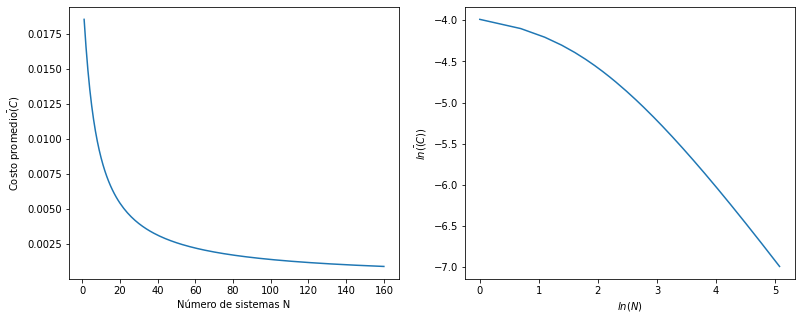

In [76]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(copias,costoProm)
plt.xlabel("Número de sistemas N")
plt.ylabel("Costo promedio"+r"$\bar(C)$")
plt.subplot(1,2,2)
plt.xlabel(r"$ln(N)$")
plt.ylabel(r"$ln(\bar{C})$")
plt.plot(np.log(copias),np.log(costoProm))

In [68]:
x,y=np.log(costoN(100)[0][50:]).reshape((-1,1)),np.log(costoN(100)[1][50:])

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
model=LinearRegression()

In [71]:
model.fit(x,y)

LinearRegression()

In [72]:
model=LinearRegression().fit(x,y)

In [73]:
model.score(x,y)

0.9999444280356106

In [74]:
inter=model.intercept_
np.exp(inter)

0.08298537435107377

In [75]:
coef=model.coef_
coef

array([-0.88350967])